In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os
import tqdm
import glob
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.data.experimental import AUTOTUNE
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip, RandomContrast
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras import applications
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam


from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision, AUC,Recall
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
import copy
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.vgg19 import VGG19,preprocess_input
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
!pip install visualkeras
!pip install ann_visualizer
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=6700a6eb2551edc5a0dd42c3dbb05e2df90e2dde90b2cb276c37d2318b1dd04f
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [ ]:
input_folder = '/content/drive/My Drive/kaggle_dataset'
output_folder = '/content/drive/My Drive/preprocessed_kaggledataset'

train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

#splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(train_ratio, validation_ratio, test_ratio))


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE=16
IMG_SIZE=(128,128)
SEED=1345

train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0,
                                zoom_range=0.2)

validation_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)


#Defining directories for train,validation,test
train_dir = '/content/drive/My Drive/preprocessed_kaggledataset/train'
validation_dir = '/content/drive/My Drive/preprocessed_kaggledataset/val'
test_dir = '/content/drive/My Drive/preprocessed_kaggledataset/test'


#Defining generatores for train,validation,test

train_generator=train_datagen.flow_from_directory(
    train_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size=64,
        class_mode ='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        seed = SEED,
        shuffle=True,
        batch_size=64,
        class_mode ='categorical',)

# Define generator for test set using flow_from_directory
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(128, 128),
        shuffle=True,
        seed = SEED,
        batch_size =64,
        class_mode ='categorical',
)



Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [ ]:
class_names=list(train_generator.class_indices.keys())
print(class_names)

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


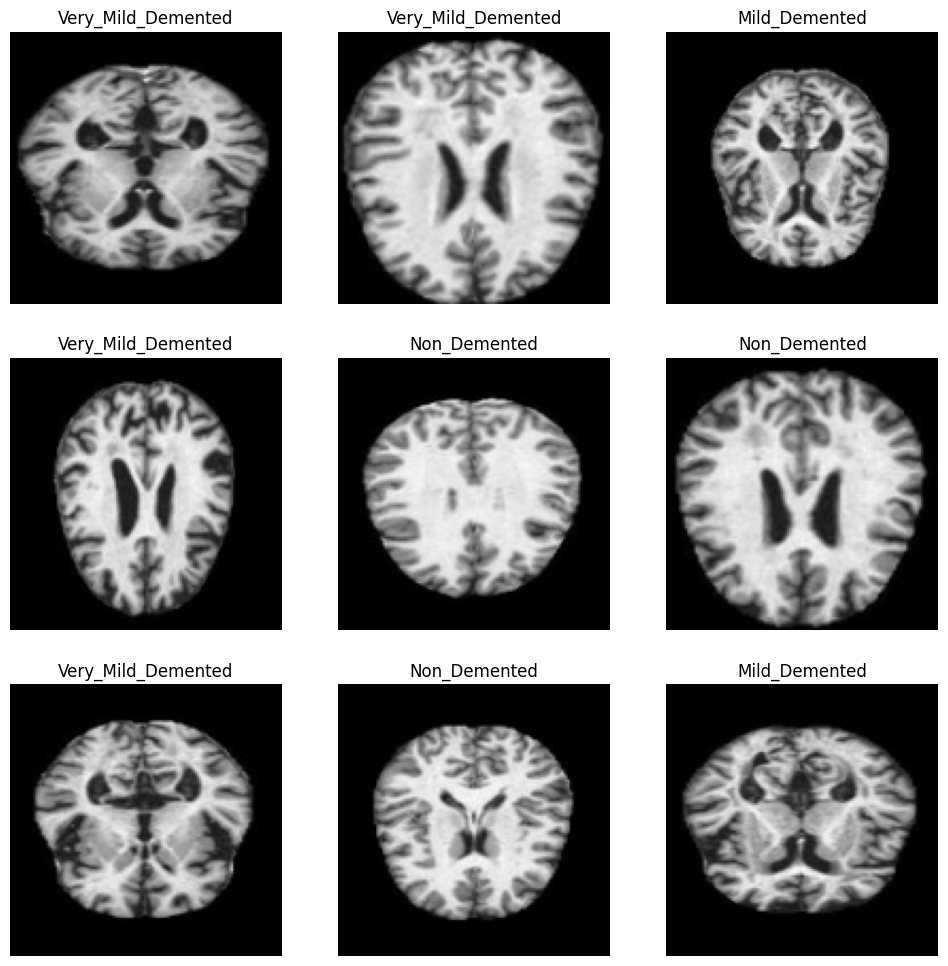

In [ ]:
plt.figure(figsize=(12,12))

for images,labels in train_generator:
#     print(images)
#     print(len(labels))
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i])
        print(images[i].shape)
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    break

In [ ]:
# def data_augmentar():
#     data_augmentation = Sequential()
#     data_augmentation.add(RandomRotation(factor=(-0.15, 0.15)))
#     data_augmentation.add(RandomZoom((-0.3, -0.1)))
#     return data_augmentation

In [ ]:
# data_augmentation = data_augmentar()
# assert(data_augmentation.layers[0].name.startswith('random_rotation'))
# assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
# assert(data_augmentation.layers[1].name.startswith('random_zoom'))
# assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip, RandomContrast

# Define data augmentation
def data_augmentar():
    data_augmentation = Sequential([
        RandomRotation(factor=(-0.15, 0.15)),
        RandomZoom((-0.3, -0.1)),
        RandomFlip("horizontal_and_vertical"),
        RandomContrast(factor=0.2),

    ])
    return data_augmentation

# Function to plot augmented images
def plot_augmented_images(image_path, augmentor, num_of_images=4):
    original_image = load_img(image_path, target_size=(128, 128))
    original_image = img_to_array(original_image) / 255.
    plt.figure(figsize=(12, 6))

    plt.subplot(2, num_of_images, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis('off')

    for i in range(num_of_images):
        augmented_image = augmentor(np.expand_dims(original_image, 0))[0]
        plt.subplot(2, num_of_images, i + 1 + num_of_images)
        plt.imshow(augmented_image)
        plt.title(f"Augmented {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Initialize data augmentation
data_augmentation = data_augmentar()

# Assertions to verify the configuration of augmentation layers
assert(data_augmentation.layers[0].name.startswith('random_rotation'))
assert(data_augmentation.layers[0].factor == (-0.15, 0.15))
assert(data_augmentation.layers[1].name.startswith('random_zoom'))
assert(data_augmentation.layers[1].height_factor == (-0.3, -0.1))
# Additional assertions for new layers
assert(data_augmentation.layers[2].name.startswith('random_flip'))
assert(data_augmentation.layers[3].name.startswith('random_contrast'))


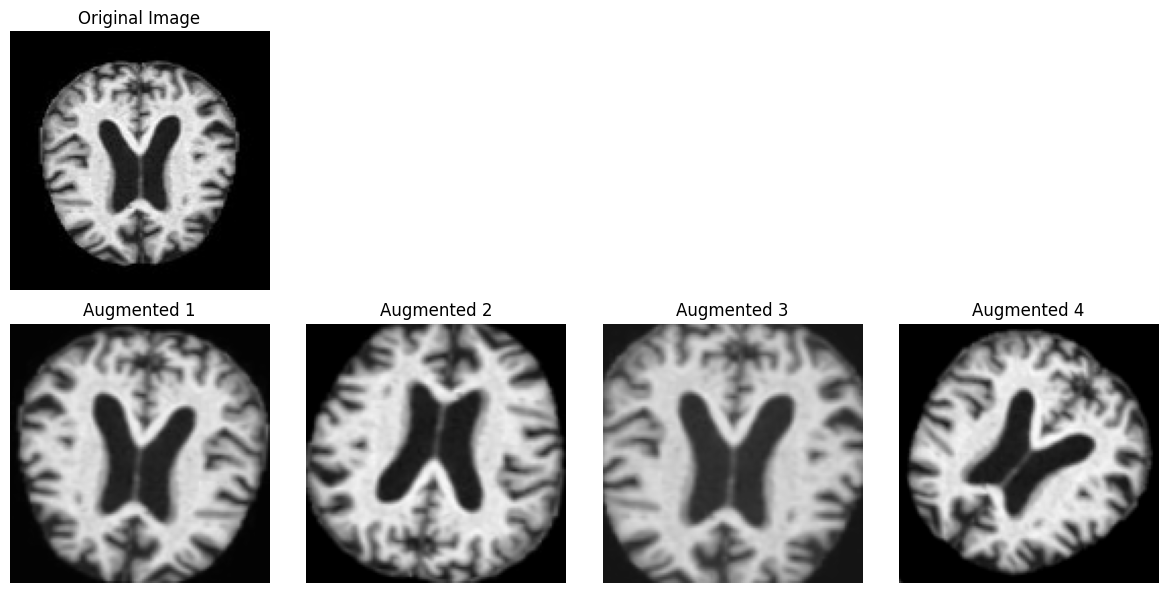

In [ ]:
# Visualization
sample_image_path = '/content/drive/My Drive/SampleMRI/mild.jpg'  # Replace with your sample image path
plot_augmented_images(sample_image_path, data_augmentation)


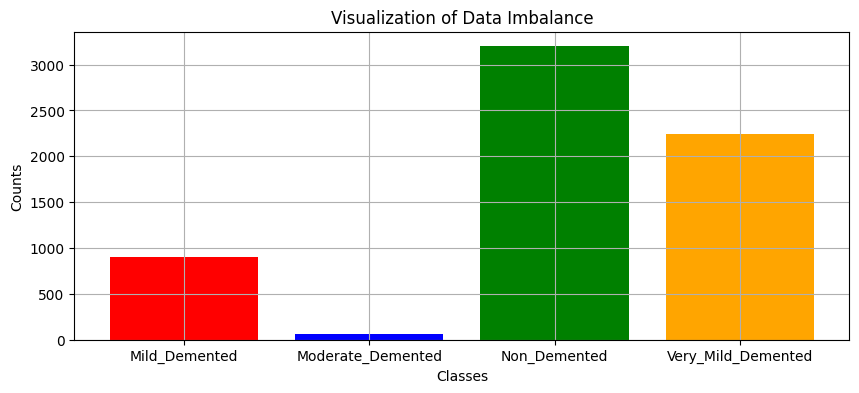

In [ ]:
input_folder='/content/drive/My Drive/kaggle_dataset'

class_count=dict()

for i in class_names:
    class_count[i]=len(os.listdir(input_folder+'/'+i))

plt.figure(figsize=(10,4))
colors = ['red', 'blue', 'green', 'orange']
plt.bar(class_count.keys(),class_count.values(),color=colors)

plt.xlabel('Classes')
plt.ylabel('Counts')
plt.title('Visualization of Data Imbalance')
plt.grid(True)
plt.show()

In [ ]:
total_samples=sum(class_count.values())

for i in range(4):
    class_weight = round(total_samples / (4 * list(class_count.values())[i]), 2)
    print(f'Weight for class \"{class_names[i]}\" : {class_weight}')

Weight for class "Mild_Demented" : 1.79
Weight for class "Moderate_Demented" : 25.0
Weight for class "Non_Demented" : 0.5
Weight for class "Very_Mild_Demented" : 0.71


In [ ]:
filepath = '/content/drive/My Drive/MyModels/Vgg_best_weights.hdf5'
earlystopping=EarlyStopping(monitor='val_accuracy',
                           mode='max',
                           patience=15,
                           verbose=1)

checkpoint=ModelCheckpoint(filepath,monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)

callback_list=[earlystopping,checkpoint]

In [ ]:
input_shape = (128,128, 3)

#Create an instance of the VGG16 model
vgg16 = VGG16(include_top=False, input_shape=input_shape,
                   weights='imagenet')

# Freeze the layers of the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

# Create a new model with additional layers
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

prediction_layer = keras.layers.Dense(4,activation='softmax')

model = tf.keras.Sequential([vgg16, global_average_layer,
  keras.layers.BatchNormalization(),
  keras.layers.Dense(2048, activation='relu'),
  keras.layers.Dense(512, activation='relu'),
  keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(64, activation='relu'),
  prediction_layer
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(),
                        tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(),])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 2048)              1050624   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 256)              

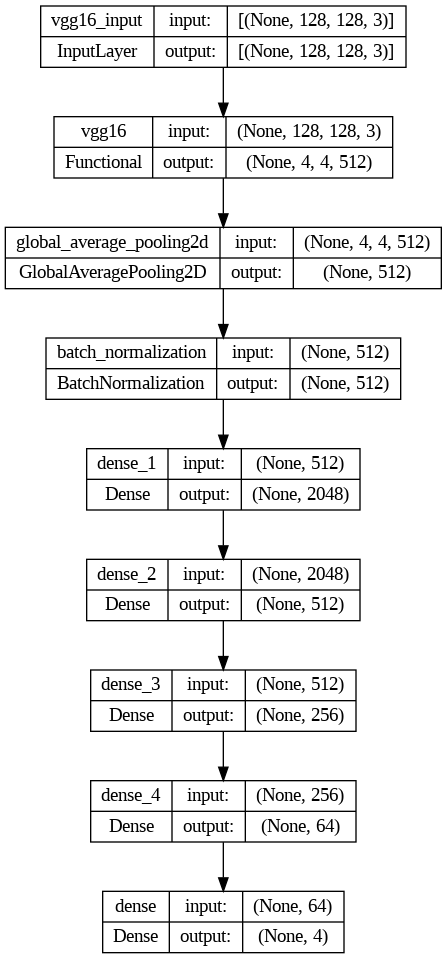

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='modelVGG16_plot.png', show_shapes=True, show_layer_names=True)

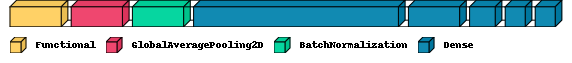

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [ ]:
history=model.fit(train_generator,
                        validation_data=validation_generator,
                        steps_per_epoch=len(train_generator),
                        epochs = 20,
                        verbose = 1)

Epoch 1/20
39/80 [=============>................] - ETA: 7:22 - loss: 0.9982 - accuracy: 0.5176 - auc: 0.8109 - precision: 0.6174 - recall: 0.3678

KeyboardInterrupt: 

In [ ]:
# Define the file path for saving the model
model_save_path = '/content/drive/My Drive/MyModels/TrainedModel'

# Save the model
model.save(model_save_path)


In [ ]:
import tensorflow as tf

# Replace this path with the path where your model is saved
model_path = '/content/drive/My Drive/MyModels/TrainedModel'
loaded_model = tf.keras.models.load_model(model_path)


In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Replace with the path to your MRI scan image
sample_image_path = '/content/drive/My Drive/SampleMRI/non_2.jpg'
preprocessed_image = preprocess_image(sample_image_path, target_size=(128, 128))

prediction = loaded_model.predict(preprocessed_image)

# Assuming you have the class names stored in a list called class_names
class_names = ['Mild', 'Moderate', 'Non-Demented', 'Ver-Mild']  # Replace with your actual class names
predicted_class = class_names[np.argmax(prediction)]
print(f"The model predicts this MRI scan as: {predicted_class} with confidence: {np.max(prediction)}")


1/1 [==============================] - 0s 21ms/step
The model predicts this MRI scan as: Non-Demented with confidence: 0.9967526197433472


In [ ]:
result = loaded_model.evaluate(test_generator)
test_loss = result[0]
test_accuracy = result[1]
test_AUC = result[2]
test_pre = result[3]
test_rec = result[4]
print(f'Test Loss = {test_loss}')
print(f'Test Accuracy = {test_accuracy}')
print(f'Test AUC = {test_AUC}')
print(f'Test Precision = {test_pre}')
print(f'Test Recall = {test_rec}')

11/11 [==============================] - 2s 157ms/step - loss: 0.2250 - accuracy: 0.9174 - auc: 0.9901 - precision: 0.9244 - recall: 0.9143
Test Loss = 0.22502468526363373
Test Accuracy = 0.9174454808235168
Test AUC = 0.9900897741317749
Test Precision = 0.9244094491004944
Test Recall = 0.914330244064331


In [ ]:
result = loaded_model.evaluate(train_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Train Loss = {train_loss}')
print(f'Train Accuracy = {train_accuracy}')
print(f'Train AUC = {train_AUC}')
print(f'Train Precision = {train_pre}')
print(f'Train Recall = {train_rec}')

80/80 [==============================] - 270s 3s/step - loss: 0.1211 - accuracy: 0.9543 - auc: 0.9974 - precision: 0.9592 - recall: 0.9502
Train Loss = 0.12114747613668442
Train Accuracy = 0.9542879462242126
Train AUC = 0.9974373579025269
Train Precision = 0.9591796398162842
Train Recall = 0.9501855969429016


In [ ]:
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy - ' + str(format(result[1], "0.2f")))
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Recall
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model recall - ' + str(format(result[4], "0.2f")))
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# AUC
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc - ' + str(format(result[2], "0.2f")))
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()